# Vehicles

**Author:** Nokubonga Dlamini <br> **Date:** 10 April 2023 <br> **Source:** https://www.kaggle.com/datasets/tr1gg3rtrash/cars-2022-dataset <br> **Github url:**

In [40]:
import pandas as pd
import numpy as np
from scipy import stats 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
%matplotlib inline


Vehicles_dataset=pd.read_csv('Vehicles.csv')

Vehicles_dataset

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
2,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,57.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750
3,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,60.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,57.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Mercedes-Benz AMG A 45 S,35,Petrol,1991,4,5.0,Automatic,0.0,Hatchback,4.5,659000,999000,500.0,5250,415.71,6750
199,BMW 3 Series Gran Limousine,3,Petrol,1998,4,5.0,Automatic,59.0,Sedan,4.5,1041000,1041000,400.0,4400,254.79,5000
200,MG Hector Plus,2,Diesel,1956,4,7.0,Manual,60.0,SUV,4.5,1615000,2075000,350.0,2500,167.67,3750
201,Audi RS Q8,9,Petrol,3998,8,5.0,Automatic,85.0,SUV,3.5,21700000,21700000,800.0,4500,591.39,6000


# Cleaning my dataset

Checking the number of columns <br>Checking for missing values<br>Checking for duplicate values

In [4]:
#Top records of the dataset

Vehicles_df = pd.read_csv('Vehicles.csv')
Vehicles_df.head(10)

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
2,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,57.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750
3,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,60.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,57.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500
5,Toyota Fortuner,99,Diesel,2755,4,7.0,Automatic,80.0,SUV,4.5,3240000,4957000,500.0,2800,201.15,3400
6,Hyundai Creta,731,Diesel,1493,4,5.0,Automatic,50.0,SUV,4.5,1044000,1818000,250.0,2750,113.45,4000
7,Tata Punch,381,Petrol,1199,3,5.0,Automatic,37.0,SUV,4.5,593000,949000,113.0,3400,84.48,6000
8,Mahindra Bolero,107,Diesel,1498,3,7.0,Manual,60.0,SUV,4.5,933000,1026000,210.0,2200,74.96,3600
9,Maruti Swift,205,Petrol,1197,4,5.0,Automatic,37.0,Hatchback,4.0,592000,885000,113.0,4400,88.50,6000


In [5]:
#Checking the number of columns

Vehicles_df.columns

Index(['car_name', 'reviews_count', 'fuel_type', 'engine_displacement',
       'no_cylinder', 'seating_capacity', 'transmission_type',
       'fuel_tank_capacity', 'body_type', 'rating', 'starting_price',
       'ending_price', 'max_torque_nm', 'max_torque_rpm', 'max_power_bhp',
       'max_power_rp'],
      dtype='object')

In [6]:
#Check for missing values

Vehicles_df.isnull().sum()

car_name               0
reviews_count          0
fuel_type              0
engine_displacement    0
no_cylinder            0
seating_capacity       1
transmission_type      0
fuel_tank_capacity     0
body_type              0
rating                 0
starting_price         0
ending_price           0
max_torque_nm          0
max_torque_rpm         0
max_power_bhp          0
max_power_rp           0
dtype: int64

In [8]:
# Replace the missing value in the column "seating_capacity"
mean_value = Vehicles_df["seating_capacity"].mean()
mean_value

5.014851485148514

In [10]:
# Using the mean value to replace the missing record
Vehicles_df["seating_capacity"].fillna(mean_value, inplace=True)

In [11]:
# Confirming the change
Vehicles_df.isnull().sum()

car_name               0
reviews_count          0
fuel_type              0
engine_displacement    0
no_cylinder            0
seating_capacity       0
transmission_type      0
fuel_tank_capacity     0
body_type              0
rating                 0
starting_price         0
ending_price           0
max_torque_nm          0
max_torque_rpm         0
max_power_bhp          0
max_power_rp           0
dtype: int64

In [12]:
# Check for information concerning the dataset

Vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             203 non-null    object 
 1   reviews_count        203 non-null    int64  
 2   fuel_type            203 non-null    object 
 3   engine_displacement  203 non-null    int64  
 4   no_cylinder          203 non-null    int64  
 5   seating_capacity     203 non-null    float64
 6   transmission_type    203 non-null    object 
 7   fuel_tank_capacity   203 non-null    float64
 8   body_type            203 non-null    object 
 9   rating               203 non-null    float64
 10  starting_price       203 non-null    int64  
 11  ending_price         203 non-null    int64  
 12  max_torque_nm        203 non-null    float64
 13  max_torque_rpm       203 non-null    int64  
 14  max_power_bhp        203 non-null    float64
 15  max_power_rp         203 non-null    int

In [14]:
# Checking for duplicate value

Vehicles_df.duplicated().sum()

0

# Statistic

In [49]:
# Mean
import statistics

starting_price=Vehicles_df.iloc[:,[10]].values
n = len (starting_price)
get_sum= sum (starting_price)
mean = get_sum/n
print("Mean is:"+ str(mean))

Mean is:[9443640.39408867]


In [55]:
# Minimum
Vehicles_df.apply(np.min)

car_name               Aston Martin DBX
reviews_count                         1
fuel_type                           CNG
engine_displacement                   0
no_cylinder                           0
seating_capacity                    2.0
transmission_type             Automatic
fuel_tank_capacity                  0.0
body_type                   Convertible
rating                              3.0
starting_price                   339000
ending_price                     361000
max_torque_nm                      16.1
max_torque_rpm                        0
max_power_bhp                      10.8
max_power_rp                          0
dtype: object

In [56]:
# Maximum
Vehicles_df.apply(np.max)

car_name               Volvo XC90
reviews_count                2392
fuel_type                  Petrol
engine_displacement          6750
no_cylinder                    12
seating_capacity              8.0
transmission_type          Manual
fuel_tank_capacity          100.0
body_type                   Wagon
rating                        5.0
starting_price           70600000
ending_price             90000000
max_torque_nm              1020.0
max_torque_rpm               7000
max_power_bhp              788.52
max_power_rp                 8500
dtype: object

In [67]:
# Median
Vehicles_df.median()

C:\Users\Nokubonga Dlamini\AppData\Local\Temp\ipykernel_11592\2162612820.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Vehicles_df.median()


reviews_count               14.00
engine_displacement       1991.00
no_cylinder                  4.00
seating_capacity             5.00
fuel_tank_capacity          50.00
rating                       4.50
starting_price         4312000.00
ending_price           4600000.00
max_torque_nm              360.00
max_torque_rpm            3500.00
max_power_bhp              187.74
max_power_rp              5500.00
dtype: float64

In [68]:
# Mode
print('Mode:\n', Vehicles_df.mode(), '\n')

Mode:
                        car_name  reviews_count fuel_type  engine_displacement  \
0   BMW 3 Series Gran Limousine            1.0    Petrol                  0.0   
1           Mahindra Bolero Neo            NaN       NaN                  NaN   
2         Porsche Cayenne Coupe            NaN       NaN                  NaN   
3                 Toyota Glanza            NaN       NaN                  NaN   
4                           NaN            NaN       NaN                  NaN   
5                           NaN            NaN       NaN                  NaN   
6                           NaN            NaN       NaN                  NaN   
7                           NaN            NaN       NaN                  NaN   
8                           NaN            NaN       NaN                  NaN   
9                           NaN            NaN       NaN                  NaN   
10                          NaN            NaN       NaN                  NaN   
11                   

In [69]:
# Size & Shape
print(Vehicles_df.size)
print(Vehicles_df.shape)

3248
(203, 16)


In [70]:
# Geometric mean
print('Geometric mean \n',stats.gmean(Vehicles_df.loc[:,'ending_price']))

Geometric mean 
 4688627.283189085


In [71]:
# Range
Vehicles_dataset=pd.read_csv('Vehicles.csv')

Vehicles_dataset

print(Vehicles_dataset.head())

             car_name  reviews_count fuel_type  engine_displacement  \
0     Maruti Alto K10             51    Petrol                  998   
1       Maruti Brezza             86    Petrol                 1462   
2       Mahindra Thar            242    Diesel                 2184   
3     Mahindra XUV700            313    Diesel                 2198   
4  Mahindra Scorpio-N            107    Diesel                 2198   

   no_cylinder  seating_capacity transmission_type  fuel_tank_capacity  \
0            3               5.0         Automatic                27.0   
1            4               5.0         Automatic                48.0   
2            4               4.0         Automatic                57.0   
3            4               7.0         Automatic                60.0   
4            4               7.0         Automatic                57.0   

   body_type  rating  starting_price  ending_price  max_torque_nm  \
0  Hatchback     4.5          399000        583000         

In [72]:
print("range is",Vehicles_dataset.starting_price.max()-Vehicles_dataset.starting_price.min())

range is 70261000


In [73]:
print("range is",Vehicles_dataset.ending_price.max()-Vehicles_dataset.ending_price.min())

range is 89639000


In [74]:
# Weighted mean
weighted_mean = (Vehicles_dataset["starting_price"] * Vehicles_dataset["ending_price"]).sum() / Vehicles_dataset["ending_price"].sum()
weighted_mean

27825798.80932288

In [75]:
# Standard Deviation
print(Vehicles_df.std())

reviews_count          3.143313e+02
engine_displacement    1.493838e+03
no_cylinder            2.538664e+00
seating_capacity       1.158173e+00
fuel_tank_capacity     2.890421e+01
rating                 2.801363e-01
starting_price         1.357035e+07
ending_price           1.551746e+07
max_torque_nm          2.371166e+02
max_torque_rpm         1.594960e+03
max_power_bhp          1.934748e+02
max_power_rp           1.990877e+03
dtype: float64


C:\Users\Nokubonga Dlamini\AppData\Local\Temp\ipykernel_11592\1359925876.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(Vehicles_df.std())


In [76]:
print(Vehicles_df['reviews_count'].std())
print(Vehicles_df['engine_displacement'].std())
print(Vehicles_df['no_cylinder'].std())
print(Vehicles_df['seating_capacity'].std())
print(Vehicles_df['fuel_tank_capacity'].std())
print(Vehicles_df['rating'].std())
print(Vehicles_df['starting_price'].std())
print(Vehicles_df['ending_price'].std())
print(Vehicles_df['max_torque_nm'].std())
print(Vehicles_df['max_torque_rpm'].std())
print(Vehicles_df['max_power_bhp'].std())
print(Vehicles_df['max_power_rp'].std())

314.33131778412024
1493.8377858357564
2.5386636158029705
1.158172522470088
28.904206741257653
0.28013625352399085
13570354.353550779
15517463.08824574
237.11663789510436
1594.9600769995336
193.47480717965053
1990.876834992911


In [78]:
# Covariance
Vehicles_df.cov()

C:\Users\Nokubonga Dlamini\AppData\Local\Temp\ipykernel_11592\328961646.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Vehicles_df.cov()


,reviews_count,engine_displacement,no_cylinder,seating_capacity,fuel_tank_capacity,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
reviews_count,9.880418e+04,-9.309130e+04,-1.051812e+02,2.956039e+01,-6.653066e+01,1.894771,-9.279366e+08,-1.052775e+09,-2.028673e+04,-1.306372e+04,-1.705456e+04,-1.906092e+03
engine_displacement,-9.309130e+04,2.231551e+06,3.596155e+03,-4.807906e+02,1.744186e+04,-16.817149,1.261873e+10,1.470684e+10,2.404447e+05,9.509700e+05,2.091177e+05,1.272827e+06
no_cylinder,-1.051812e+02,3.596155e+03,6.444813e+00,-8.518773e-01,2.800637e+01,-0.063978,1.999645e+07,2.337551e+07,3.705059e+02,1.922836e+03,3.372329e+02,2.647122e+03
seating_capacity,2.956039e+01,-4.807906e+02,-8.518773e-01,1.341364e+00,-4.358788e-01,0.065349,-4.940618e+06,-4.966148e+06,-6.228089e+01,-3.459863e+02,-8.735984e+01,-4.843643e+02
fuel_tank_capacity,-6.653066e+01,1.744186e+04,2.800637e+01,-4.358788e-01,8.354532e+02,0.194019,5.674758e+07,7.981782e+07,6.497790e+02,1.488632e+04,8.450357e+02,1.901140e+04
rating,1.894771e+00,-1.681715e+01,-6.397844e-02,6.534899e-02,1.940192e-01,0.078476,1.061195e+05,1.652066e+05,-7.960635e-01,-1.855025e+01,-1.987082e+00,-1.105448e+01
starting_price,-9.279366e+08,1.261873e+10,1.999645e+07,-4.940618e+06,5.674758e+07,106119.531288,1.841545e+14,2.054225e+14,2.039889e+09,2.106429e+09,1.760237e+09,2.217140e+09
ending_price,-1.052775e+09,1.470684e+10,2.337551e+07,-4.966148e+06,7.981782e+07,165206.591718,2.054225e+14,2.407917e+14,2.322868e+09,2.833509e+09,2.016466e+09,3.019059e+09
max_torque_nm,-2.028673e+04,2.404447e+05,3.705059e+02,-6.228089e+01,6.497790e+02,-0.796064,2.039889e+09,2.322868e+09,5.622430e+04,2.561224e+04,4.209747e+04,1.664018e+03
max_torque_rpm,-1.306372e+04,9.509700e+05,1.922836e+03,-3.459863e+02,1.488632e+04,-18.550249,2.106429e+09,2.833509e+09,2.561224e+04,2.543898e+06,7.650313e+04,2.746791e+06


In [79]:
# Sum
Vehicles.sum()

1714582.127144849

In [81]:
Vehicles_df.describe()

,reviews_count,engine_displacement,no_cylinder,seating_capacity,fuel_tank_capacity,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,2.030000e+02,2.030000e+02,203.000000,203.000000,203.000000,203.000000
mean,118.684729,2305.921182,4.709360,5.014851,46.143842,4.433498,9.443640e+06,1.112005e+07,402.804828,3346.507389,266.576995,4790.147783
std,314.331318,1493.837786,2.538664,1.158173,28.904207,0.280136,1.357035e+07,1.551746e+07,237.116638,1594.960077,193.474807,1990.876835
min,1.000000,0.000000,0.000000,2.000000,0.000000,3.000000,3.390000e+05,3.610000e+05,16.100000,0.000000,10.800000,0.000000
25%,5.000000,1339.500000,4.000000,5.000000,33.500000,4.500000,9.455000e+05,1.407500e+06,201.000000,2500.000000,108.555000,3800.000000
50%,14.000000,1991.000000,4.000000,5.000000,50.000000,4.500000,4.312000e+06,4.600000e+06,360.000000,3500.000000,187.740000,5500.000000
75%,83.000000,2996.000000,6.000000,5.000000,66.000000,4.500000,1.160000e+07,1.575000e+07,590.000000,4500.000000,384.870000,6000.000000
max,2392.000000,6750.000000,12.000000,8.000000,100.000000,5.000000,7.060000e+07,9.000000e+07,1020.000000,7000.000000,788.520000,8500.000000


In [6]:
Vehicles_df['seating_capacity'].replace(['Poor','Below Average', 'Average', 'Above Average','Excellent'],[3.0,4.0,5.0,6.0,7.0], inplace =True)
Vehicles_df.head()

,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
1,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
2,242,Diesel,2184,4,4.0,Automatic,57.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750
3,313,Diesel,2198,4,7.0,Automatic,60.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500
4,107,Diesel,2198,4,7.0,Automatic,57.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500


# Graphs

### Box Plot

<function matplotlib.pyplot.show(close=None, block=None)>

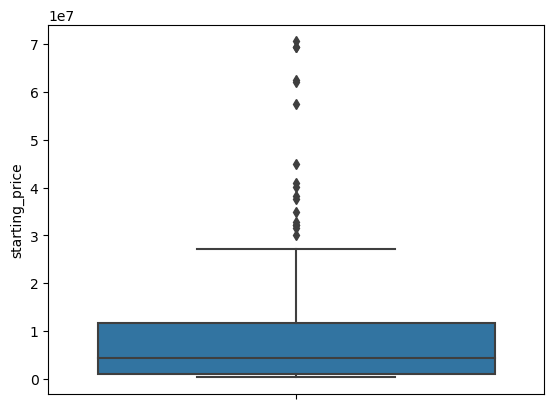

In [9]:
sns.boxplot(y = Vehicles_df['starting_price'])
plt.show

### Scatter Plot

<function matplotlib.pyplot.show(close=None, block=None)>

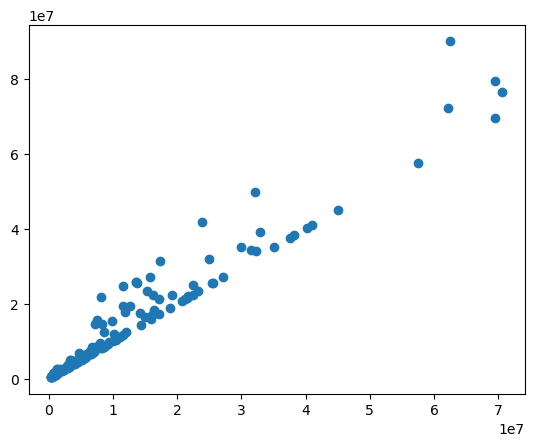

In [119]:
plt.scatter(Vehicles_df['starting_price'], Vehicles_df['ending_price'])
plt.show

### Line graph

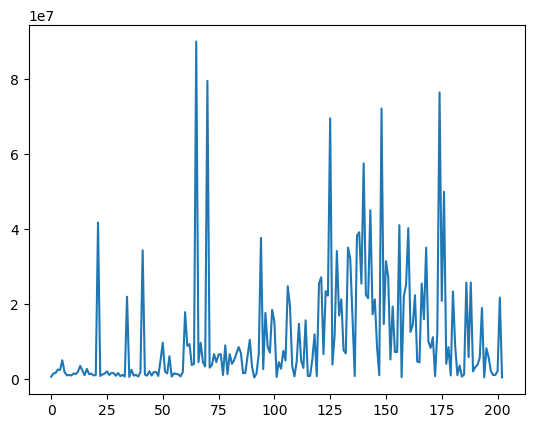

In [130]:
graph = Vehicles_df['ending_price']
graphplot = graph.plot(kind="line")

### Linear Regression

In [44]:
Vehicles=pd.read_csv('Vehicles.csv')

x=Vehicles.iloc[:,[10]].values
y=Vehicles.iloc[:,[11]].values

In [26]:
x

array([[  399000],
       [  799000],
       [ 1353000],
       [ 1318000],
       [ 1199000],
       [ 3240000],
       [ 1044000],
       [  593000],
       [  933000],
       [  592000],
       [  760000],
       [  753000],
       [ 1049000],
       [ 2770000],
       [ 1470000],
       [  649000],
       [ 1786000],
       [  835000],
       [  749000],
       [  624000],
       [  950000],
       [23900000],
       [  540000],
       [  703000],
       [  841000],
       [ 1415000],
       [  630000],
       [ 1199000],
       [  941000],
       [  571000],
       [ 1157000],
       [  525000],
       [  597000],
       [  464000],
       [ 8072000],
       [  339000],
       [ 2384000],
       [  600000],
       [  599000],
       [  425000],
       [ 1022000],
       [31500000],
       [  663000],
       [  592000],
       [ 1589000],
       [  609000],
       [ 1122000],
       [ 1099000],
       [  535000],
       [ 4490000],
       [ 9390000],
       [ 1129000],
       [ 112

In [27]:
y

array([[  583000],
       [ 1396000],
       [ 1603000],
       [ 2458000],
       [ 2390000],
       [ 4957000],
       [ 1818000],
       [  949000],
       [ 1026000],
       [  885000],
       [ 1408000],
       [ 1272000],
       [ 1865000],
       [ 3454000],
       [ 2220000],
       [  971000],
       [ 2654000],
       [ 1279000],
       [ 1379000],
       [  918000],
       [ 1000000],
       [41700000],
       [  782000],
       [ 1154000],
       [ 1407000],
       [ 2011000],
       [ 1025000],
       [ 1549000],
       [ 1545000],
       [  806000],
       [ 1552000],
       [  700000],
       [ 1079000],
       [  599000],
       [21900000],
       [  503000],
       [ 2403000],
       [  859000],
       [ 1062000],
       [  599000],
       [ 1813000],
       [34300000],
       [ 1150000],
       [  851000],
       [ 2025000],
       [  887000],
       [ 1792000],
       [ 1839000],
       [  772000],
       [ 4890000],
       [ 9665000],
       [ 1949000],
       [ 145

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=0)

In [34]:
x_train,x_test,y_train,y_test

(array([[ 3224000],
        [ 5950000],
        [ 6190000],
        [  624000],
        [ 6490000],
        [12700000],
        [  463000],
        [ 4200000],
        [ 1129000],
        [  463000],
        [ 1989000],
        [ 1000000],
        [  398000],
        [ 3500000],
        [21200000],
        [32900000],
        [ 4664000],
        [ 1470000],
        [ 1199000],
        [17300000],
        [ 2999000],
        [15300000],
        [ 1122000],
        [25400000],
        [  659000],
        [ 8321000],
        [ 9260000],
        [ 1353000],
        [ 1140000],
        [ 8247000],
        [25000000],
        [  592000],
        [  760000],
        [11600000],
        [ 5999000],
        [  391000],
        [23300000],
        [ 7110000],
        [ 6990000],
        [ 1318000],
        [ 5990000],
        [32100000],
        [22500000],
        [18900000],
        [ 9390000],
        [  399000],
        [37600000],
        [ 2915000],
        [ 2200000],
        [ 3150000],


In [35]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [36]:
y_predict=reg.predict(x_test)
y_predict

array([[ 1358063.37841517],
       [ 1198702.16867105],
       [ 1033649.48715036],
       [ 1188457.51947322],
       [  964213.53147614],
       [ 4134363.31102871],
       [ 4193554.61750509],
       [22246903.09280266],
       [ 1699551.6850097 ],
       [13595865.99240786],
       [ 9895271.04327846],
       [15872454.70303807],
       [16100113.57410109],
       [46264913.98995136],
       [ 7938543.04649179],
       [ 1180489.45898601],
       [18718190.59132583],
       [ 8655668.49034031],
       [ 7329555.56639821],
       [ 5229402.48084184],
       [ 2314230.63687986],
       [10180982.92646255],
       [ 4374543.4200002 ],
       [17466066.80047922],
       [ 1586860.5438335 ],
       [26003274.46534251],
       [ 7107588.16711176],
       [10408641.79752557],
       [10272046.47488775],
       [16669260.75175864],
       [  950553.99921236],
       [13937354.29900239],
       [ 2538474.62487693],
       [ 5570890.78743637],
       [ 8006840.7078107 ],
       [ 1120159.858

In [37]:
x_test

array([[  749000],
       [  609000],
       [  464000],
       [  600000],
       [  403000],
       [ 3188000],
       [ 3240000],
       [19100000],
       [ 1049000],
       [11500000],
       [ 8249000],
       [13500000],
       [13700000],
       [40200000],
       [ 6530000],
       [  593000],
       [16000000],
       [ 7160000],
       [ 5995000],
       [ 4150000],
       [ 1589000],
       [ 8500000],
       [ 3399000],
       [14900000],
       [  950000],
       [22400000],
       [ 5800000],
       [ 8700000],
       [ 8580000],
       [14200000],
       [  391000],
       [11800000],
       [ 1786000],
       [ 4450000],
       [ 6590000],
       [  540000],
       [ 2685000],
       [ 6700000],
       [ 1199000],
       [14400000],
       [69500000],
       [  618000],
       [ 1449000],
       [  630000],
       [17100000],
       [ 4000000],
       [ 4590000],
       [  933000],
       [10400000],
       [ 9950000],
       [ 6590000],
       [  885000],
       [ 545

In [38]:
x_train

array([[ 3224000],
       [ 5950000],
       [ 6190000],
       [  624000],
       [ 6490000],
       [12700000],
       [  463000],
       [ 4200000],
       [ 1129000],
       [  463000],
       [ 1989000],
       [ 1000000],
       [  398000],
       [ 3500000],
       [21200000],
       [32900000],
       [ 4664000],
       [ 1470000],
       [ 1199000],
       [17300000],
       [ 2999000],
       [15300000],
       [ 1122000],
       [25400000],
       [  659000],
       [ 8321000],
       [ 9260000],
       [ 1353000],
       [ 1140000],
       [ 8247000],
       [25000000],
       [  592000],
       [  760000],
       [11600000],
       [ 5999000],
       [  391000],
       [23300000],
       [ 7110000],
       [ 6990000],
       [ 1318000],
       [ 5990000],
       [32100000],
       [22500000],
       [18900000],
       [ 9390000],
       [  399000],
       [37600000],
       [ 2915000],
       [ 2200000],
       [ 3150000],
       [45000000],
       [31500000],
       [ 327

In [39]:
y_train

array([[ 3378000],
       [ 6560000],
       [ 6790000],
       [  918000],
       [ 7160000],
       [19300000],
       [  594000],
       [ 4600000],
       [ 1949000],
       [  583000],
       [ 1989000],
       [ 1444000],
       [  496000],
       [ 3790000],
       [21200000],
       [39100000],
       [ 4850000],
       [ 2220000],
       [ 1549000],
       [31400000],
       [ 3549000],
       [23400000],
       [ 1792000],
       [25400000],
       [  999000],
       [14700000],
       [ 9260000],
       [ 1603000],
       [ 1860000],
       [ 8247000],
       [32000000],
       [  851000],
       [ 1408000],
       [24700000],
       [ 6599000],
       [  397000],
       [23300000],
       [14600000],
       [ 6990000],
       [ 2458000],
       [ 6555000],
       [49900000],
       [25100000],
       [18900000],
       [ 9665000],
       [  583000],
       [37600000],
       [ 2915000],
       [ 2588000],
       [ 3950000],
       [45000000],
       [34300000],
       [ 328

In [40]:
y_test

array([[ 1379000],
       [  887000],
       [  599000],
       [  859000],
       [  651000],
       [ 3188000],
       [ 4957000],
       [22200000],
       [ 1865000],
       [19300000],
       [ 8808000],
       [25700000],
       [25400000],
       [40200000],
       [ 7139000],
       [  949000],
       [16900000],
       [ 7600000],
       [ 6495000],
       [ 4450000],
       [ 2025000],
       [ 8500000],
       [ 3680000],
       [16400000],
       [ 1490000],
       [22400000],
       [ 5800000],
       [ 8700000],
       [12500000],
       [17600000],
       [  397000],
       [17800000],
       [ 2654000],
       [ 4450000],
       [ 6590000],
       [  782000],
       [ 2985000],
       [ 8500000],
       [ 2390000],
       [14400000],
       [69500000],
       [  784000],
       [ 1449000],
       [ 1025000],
       [21200000],
       [ 4000000],
       [ 4590000],
       [ 1026000],
       [10400000],
       [ 9950000],
       [ 6590000],
       [  912000],
       [ 569

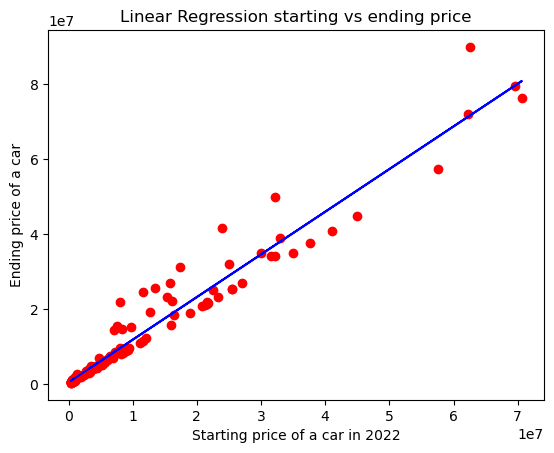

In [41]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train,reg.predict(x_train), color='blue')
plt.title("Linear Regression starting vs ending price")
plt.xlabel("Starting price of a car in 2022")
plt.ylabel("Ending price of a car")
plt.show()

### Coefficient of Correlation

In [11]:
Vehicles = pd.read_csv("Vehicles.csv")

In [12]:
Vehicles.corr()

C:\Users\Nokubonga Dlamini\AppData\Local\Temp\ipykernel_9392\2412264427.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Vehicles.corr()


,reviews_count,engine_displacement,no_cylinder,seating_capacity,fuel_tank_capacity,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
reviews_count,1.000000,-0.198252,-0.131809,0.081227,-0.007323,0.021518,-0.217540,-0.215838,-0.272184,-0.026057,-0.280433,-0.003046
engine_displacement,-0.198252,1.000000,0.948265,-0.278781,0.403951,-0.040186,0.622474,0.634447,0.678812,0.399129,0.723541,0.427978
no_cylinder,-0.131809,0.948265,1.000000,-0.290952,0.381672,-0.089962,0.580439,0.593383,0.615500,0.474884,0.686595,0.523751
seating_capacity,0.081227,-0.278781,-0.290952,1.000000,-0.013047,0.201445,-0.319862,-0.279665,-0.227307,-0.189385,-0.392984,-0.213157
fuel_tank_capacity,-0.007323,0.403951,0.381672,-0.013047,1.000000,0.023962,0.144676,0.177958,0.094807,0.322906,0.151109,0.330376
rating,0.021518,-0.040186,-0.089962,0.201445,0.023962,1.000000,0.027915,0.038005,-0.011984,-0.041517,-0.036662,-0.019821
starting_price,-0.217540,0.622474,0.580439,-0.319862,0.144676,0.027915,1.000000,0.975520,0.633948,0.097321,0.670433,0.082065
ending_price,-0.215838,0.634447,0.593383,-0.279665,0.177958,0.038005,0.975520,1.000000,0.631309,0.114486,0.671654,0.097725
max_torque_nm,-0.272184,0.678812,0.615500,-0.227307,0.094807,-0.011984,0.633948,0.631309,1.000000,0.067723,0.917634,0.003525
max_torque_rpm,-0.026057,0.399129,0.474884,-0.189385,0.322906,-0.041517,0.097321,0.114486,0.067723,1.000000,0.247916,0.865030


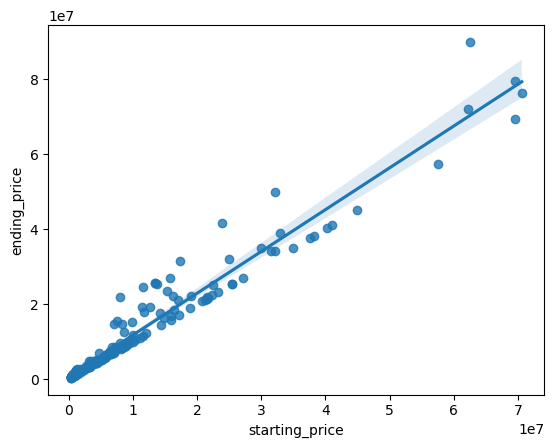

In [13]:
sns.regplot(x=Vehicles.starting_price,y=Vehicles.ending_price)
plt.show()

### Decision Tree Regressor

In [7]:
import pandas as pd
Vehicles=pd.read_csv('Vehicles.csv')

x=Vehicles.iloc[:,[10]].values
y=Vehicles.iloc[:,[11]].values

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
lin_reg=DecisionTreeRegressor(random_state=0)
lin_reg.fit(x,y)

DecisionTreeRegressor(random_state=0)

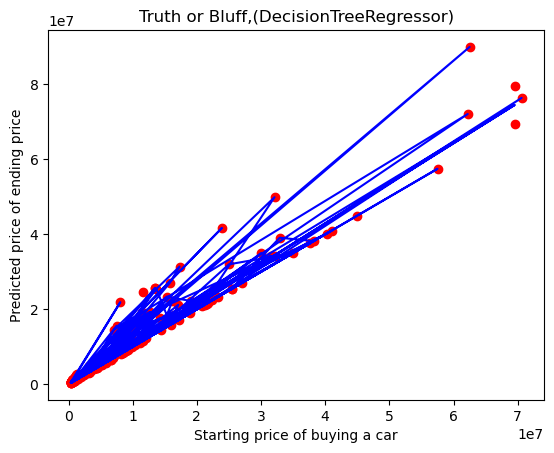

In [10]:
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg.predict(x),color='blue')
plt.title("Truth or Bluff,(DecisionTreeRegressor)")
plt.xlabel("Starting price of buying a car")
plt.ylabel("Predicted price of ending price")
plt.show()

### Seaborn Heatmap

In [28]:
Vehicles.columns

Index(['car_name', 'reviews_count', 'fuel_type', 'engine_displacement',
       'no_cylinder', 'seating_capacity', 'transmission_type',
       'fuel_tank_capacity', 'body_type', 'rating', 'starting_price',
       'ending_price', 'max_torque_nm', 'max_torque_rpm', 'max_power_bhp',
       'max_power_rp'],
      dtype='object')

In [31]:
Cars = Vehicles[['reviews_count','engine_displacement','no_cylinder', 'seating_capacity','fuel_tank_capacity', 'rating', 'starting_price', 'ending_price', 'max_torque_nm', 'max_torque_rpm', 'max_power_bhp','max_power_rp']]
Cars.head()

,reviews_count,engine_displacement,no_cylinder,seating_capacity,fuel_tank_capacity,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,51,998,3,5.0,27.0,4.5,399000,583000,89.0,3500,65.71,5500
1,86,1462,4,5.0,48.0,4.5,799000,1396000,136.8,4400,101.65,6000
2,242,2184,4,4.0,57.0,4.5,1353000,1603000,300.0,2800,130.00,3750
3,313,2198,4,7.0,60.0,4.5,1318000,2458000,450.0,2800,182.38,3500
4,107,2198,4,7.0,57.0,4.5,1199000,2390000,400.0,2750,172.45,3500


In [94]:
Cars = Vehicles_df.corr()
Cars

C:\Users\Nokubonga Dlamini\AppData\Local\Temp\ipykernel_11592\3709120179.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Cars = Vehicles_df.corr()


,reviews_count,engine_displacement,no_cylinder,seating_capacity,fuel_tank_capacity,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
reviews_count,1.000000,-0.198252,-0.131809,0.081199,-0.007323,0.021518,-0.217540,-0.215838,-0.272184,-0.026057,-0.280433,-0.003046
engine_displacement,-0.198252,1.000000,0.948265,-0.277894,0.403951,-0.040186,0.622474,0.634447,0.678812,0.399129,0.723541,0.427978
no_cylinder,-0.131809,0.948265,1.000000,-0.289733,0.381672,-0.089962,0.580439,0.593383,0.615500,0.474884,0.686595,0.523751
seating_capacity,0.081199,-0.277894,-0.289733,1.000000,-0.013021,0.201417,-0.314352,-0.276329,-0.226788,-0.187299,-0.389865,-0.210065
fuel_tank_capacity,-0.007323,0.403951,0.381672,-0.013021,1.000000,0.023962,0.144676,0.177958,0.094807,0.322906,0.151109,0.330376
rating,0.021518,-0.040186,-0.089962,0.201417,0.023962,1.000000,0.027915,0.038005,-0.011984,-0.041517,-0.036662,-0.019821
starting_price,-0.217540,0.622474,0.580439,-0.314352,0.144676,0.027915,1.000000,0.975520,0.633948,0.097321,0.670433,0.082065
ending_price,-0.215838,0.634447,0.593383,-0.276329,0.177958,0.038005,0.975520,1.000000,0.631309,0.114486,0.671654,0.097725
max_torque_nm,-0.272184,0.678812,0.615500,-0.226788,0.094807,-0.011984,0.633948,0.631309,1.000000,0.067723,0.917634,0.003525
max_torque_rpm,-0.026057,0.399129,0.474884,-0.187299,0.322906,-0.041517,0.097321,0.114486,0.067723,1.000000,0.247916,0.865030


<Axes: >

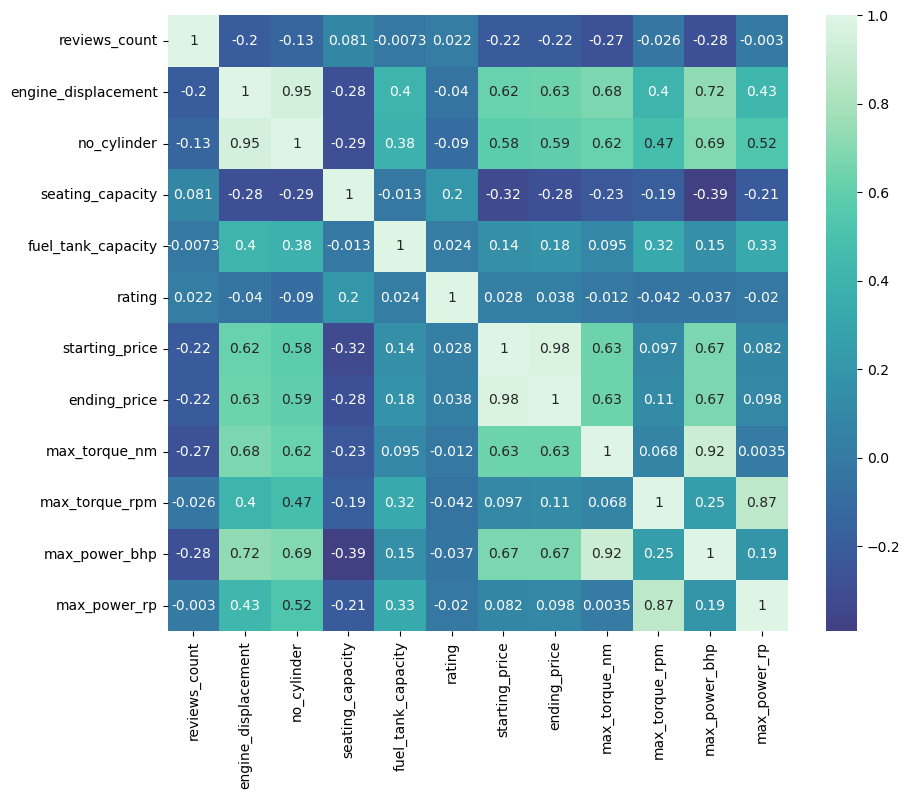

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(data = Cars, annot = True, cmap = 'mako', center = 0)

### Gaussian Data Distribulation, Skewness and Kurtosis

In [46]:
from scipy.stats import boxcox
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer


In [48]:
Vehicles_df = pd.read_csv('Vehicles.csv')
Vehicles.head()

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
2,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,57.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750
3,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,60.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,57.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500


C:\Users\Nokubonga Dlamini\AppData\Local\Temp\ipykernel_9392\797759203.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal_rets)
C:\Users\Nokubonga Dlamini\AppData\Local\Temp\ipykernel_9392\797759203.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Vehicles.starting_price)


<Axes: xlabel='starting_price', ylabel='Density'>

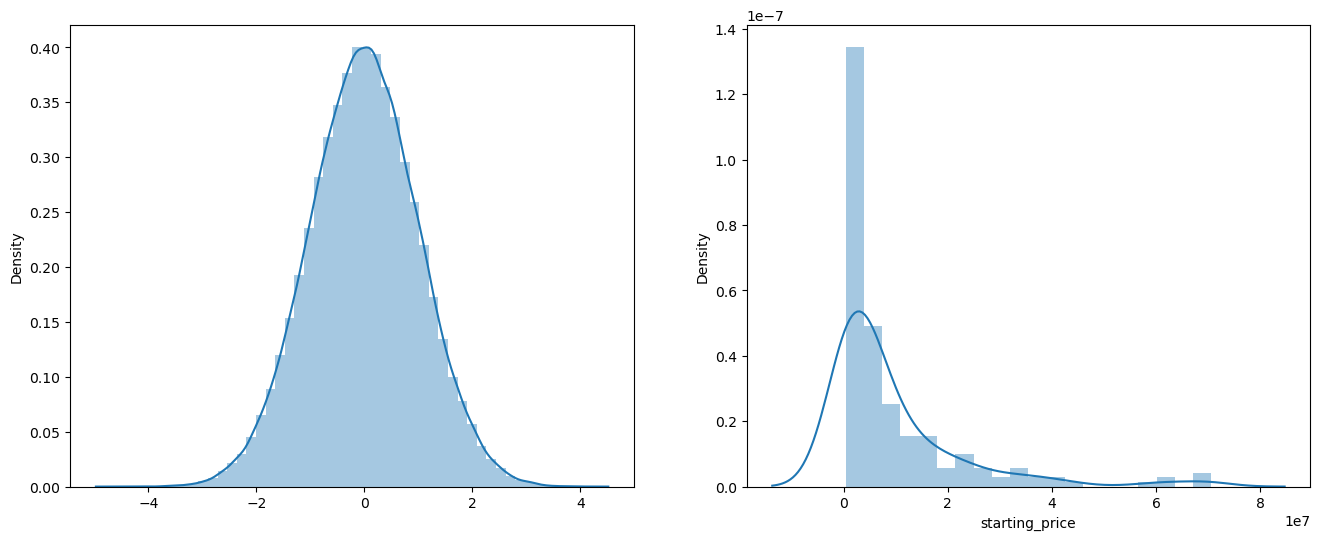

In [52]:
plt.figure(figsize=(16,6))
plt.subplot(121)
normal_rets = np.random.normal(0,1,(100000,1))
sns.distplot(normal_rets)

plt.subplot(122)
sns.distplot(Vehicles.starting_price)

In [51]:
Vehicles.starting_price.agg(['mean','median'])

mean      9.443640e+06
median    4.312000e+06
Name: starting_price, dtype: float64

In [53]:
Vehicles.skew()

C:\Users\Nokubonga Dlamini\AppData\Local\Temp\ipykernel_9392\1690683984.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Vehicles.skew()


reviews_count          5.250558
engine_displacement    0.937736
no_cylinder            0.748409
seating_capacity      -0.202496
fuel_tank_capacity    -0.392076
rating                -2.422695
starting_price         2.556630
ending_price           2.513611
max_torque_nm          0.457684
max_torque_rpm        -0.533306
max_power_bhp          0.910171
max_power_rp          -1.226396
dtype: float64

In [54]:
Vehicles.kurtosis()

C:\Users\Nokubonga Dlamini\AppData\Local\Temp\ipykernel_9392\1508552019.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Vehicles.kurtosis()


reviews_count          31.953166
engine_displacement     0.864412
no_cylinder             1.271993
seating_capacity        1.689013
fuel_tank_capacity     -0.890516
rating                  7.661294
starting_price          7.258825
ending_price            7.462684
max_torque_nm          -0.831436
max_torque_rpm         -0.188517
max_power_bhp          -0.324063
max_power_rp            0.975614
dtype: float64

### Hex Plot

<Axes: xlabel='engine_displacement', ylabel='starting_price'>

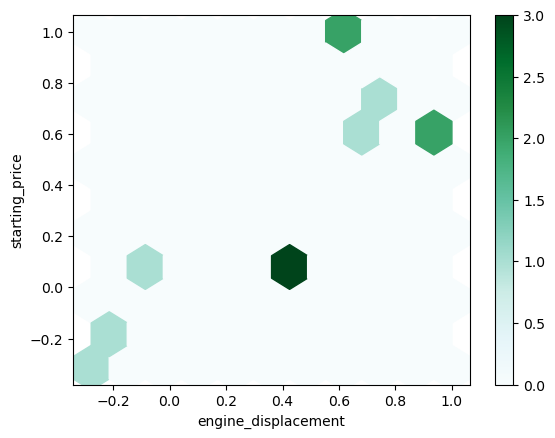

In [104]:
Cars.plot(kind="hexbin", x="engine_displacement", y="starting_price", gridsize=10)

### Histogram

<Axes: >

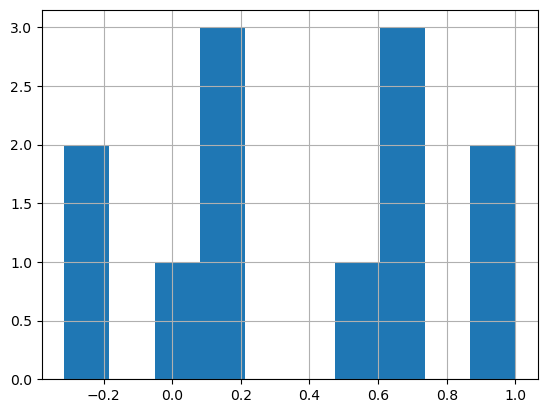

In [126]:
Cars['starting_price'].hist()

<Axes: >

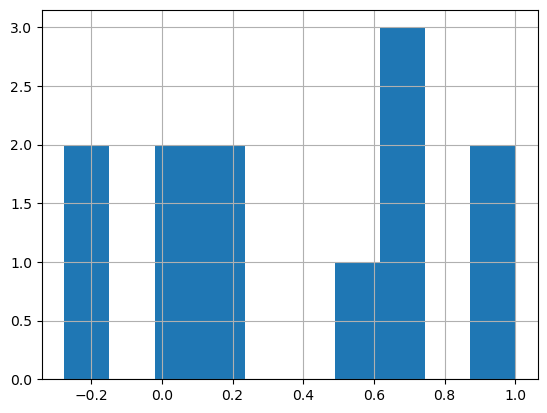

In [127]:
Cars['ending_price'].hist()

# Percentile and Quartile

In [14]:
# Quartile
import pandas as pd
Vehicles_dataset=pd.read_csv('Vehicles.csv')

Vehicles_dataset['starting_price'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.1      593800.0
0.2      837400.0
0.3     1129000.0
0.4     2753000.0
0.5     4312000.0
0.6     6458000.0
0.7     8796400.0
0.8    15140000.0
0.9    24780000.0
1.0    70600000.0
Name: starting_price, dtype: float64

In [11]:
Vehicles_dataset['ending_price'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.1      788400.0
0.2     1151600.0
0.3     1716400.0
0.4     2971000.0
0.5     4600000.0
0.6     6818000.0
0.7    10680000.0
0.8    20200000.0
0.9    27100000.0
1.0    90000000.0
Name: ending_price, dtype: float64

In [37]:
import pandas as pd
import random
Vehicles_df = pd.read_csv('Vehicles.csv')

arr=Vehicles_df.iloc[:,[10]].values
print ("25th percentile of arr : ", np.percentile(arr, 25))
print ("50th percentile of arr : ", np.percentile(arr, 50))
print ("75th percentile of arr : ", np.percentile(arr, 75))

25th percentile of arr :  945500.0
50th percentile of arr :  4312000.0
75th percentile of arr :  11600000.0


In [38]:
arr=Vehicles_df.iloc[:,[11]].values
print ("25th percentile of arr : ", np.percentile(arr, 25))
print ("50th percentile of arr : ", np.percentile(arr, 50))
print ("75th percentile of arr : ", np.percentile(arr, 75))

25th percentile of arr :  1407500.0
50th percentile of arr :  4600000.0
75th percentile of arr :  15750000.0


# Reflection on this Assignment

**Reflections on your learnings between this assignment and the previous one.**
- Python Jupyter Notebook makes working with large datasets easier than Excel.
- I also notice that my second assignment included more graphs than my first one.
- Excel serves as both the compute engine and the data repository.
- I found that data can be quickly retrieved from a multitude of sources including CSVs, Excels, JSONs, and SQL databases, as well as Python's powerful libraries, such as Pandas, NumPy, and SciPy that allow for complex data models.
- I noticed that Jupyter Notebook is an interactive environment because it allowed me to combine code, text and visualizations in a single document.
 
**What was different between Python and Excel?**
- Python requires coding in order to perform any calculations or generate the statistics you need.
- You are working with and modifying a spreadsheet in Excel.
- An Excel spreadsheet is very static and lacks visual appeal, whereas a Jupyter notebook has much more dynamic and attractive results.
 
**When will you use either of them?**
- Python:  given that it can handle large datasets rapidly and effectively, I might utilize it when I have a large dataset.
- When I have a smaller dataset or just need to do a quick calculation, I'll use Excel.
 
 **If you could do this assignment over what would you do differently?**
- It is very likely that I will change my dataset to one that has over 10000 rows and is very large
 

**What are the gaps in your programming or stats knowledge?**
- I'm still not sure how bar graphs differ from histograms and which is more important.

